# PCA算法介绍

## PCA（Principal Component Analysis）

- PCA称主成分分析，是一种常用的数据分析方法。
- PCA的主要结果是降维，降低原始数据的维数；
- PCA降维的目的是去掉原始数据中不重要的特征（或者去掉相关的特征），保留重要特征。（或者去掉相关的特征，保留不相关特征）
- PCA降维的数学理论是通过线性变换将原始数据变换为一组各维度线性无关的表示。

## 降维应用背景介绍

1. 降维背景说明
    - 在机器学习的很多应用场景中（尤其是基于统计学习的机器学习中），从特征维度与数量，都需要尽量可能的多，多维度的特征与海量的数据包含更加丰富的信息；然后才能通过机器学习训练出更加可靠的规律与结果。
    - 多特证与海量数据的要求提高了数据采集的难度。更重要的是在很多情形下，许多特征之间可能存在相关性，从而增加了问题分析的复杂性，影响机器学习的效率，提高机器学习的成本。
    - 数据样本中很多特征不是孤立的，盲目去除某些特征，就不能充分利用数据中的信息，会损失很多有用的信息，从而产生错误的结论。

    - 因此需要找到一种合理的方法，既减少需要分析特征，又减少原特征包含信息的损失，从而从分利用已经采集的数据。
    - 由于各特征之间存在一定的相关关系，因此尽可能的对特征进行融合。使得新特征维数减少，同时又不相关，而且还尽量包含原始特征的信息。



2. 降维的作用
    - 降维就是一种对高维特征数据预处理方法，是非常广泛的数据预处理方法；降维是将高维度的数据保留下最重要的一些特征，去除噪声（干扰结果的数据）和不重要的特征； 降维可以提升数据处理速度；在实际的生产和应用中，降维在一定的信息损失范围内，可以为我们节省大量的时间和成本。作妖作用归纳如下：
        - 使得数据集更易使用。
        - 降低算法的计算开销。
        - 去除噪声。
        - 使得结果容易理解。

## 数据降维的技术

- 降维的算法有很多，主要有：
    - 奇异值分解(SVD)
    - 主成分分析(PCA)
    - 因子分析(FA)
    - 独立成分分析(ICA)
    
    
- 提示
    - 这里主要讲解PCA

# Sklearn的PCA实现的应用

- 在sklearn中已经提供PCA方法的实现


##  PCA定义


1. PCA类的定义说明
```python

    class sklearn.decomposition.PCA(
        n_components=None,     # 指定保留的特征数量（降维以后的维数）
        copy=True,                    # 训练过程中是否影响原始样本数据，也影响到最后降维数据的返回方式
        whiten=False,                # 是否对降维后的数据提供白化处理。（白化就是每一维的特征做一个标准差归一化处理，除以一个标准偏差） 
        svd_solver=’auto’,          #  SVD分解的计算方法
        tol=0.0,                         # 计算奇异值的公差
        iterated_power=’auto’,    # 采用svd_solver采用randomized方式的迭代次数。
        random_state=None)      # 同来创建随机数的实例，比如随机种

```

2. PCA参数说明

    - `n_components` : int, float, None or string
        
        - int：指定降维以后的维数，如果不设置，则降维维数维去原始数据维数与样本数的最小值：n_components == min(n_samples, n_features)；
            - 如果svd_solver == 'arpack'，则 n_components必须严格小于min(n_samples, n_features)
        
        - float：当svd_solver == 'full'时，选择的特征数大于n_components指定的百分比。
        
        - string：n_components == 'mle' 且svd_solver == 'full'，使用Minka的MLE算法估算n_components的值。
        
        - None：n_components == min(n_samples, n_features) - 1
        
    - `copy` : bool (default True)，
        - False：返回降维数据使用：fit_transform(X)
        - True：返回降维数据使用：fit(X).transform(X)
        
    - `whiten` : bool, optional (default False)
        - 降维后的数据进行白化处理（标准差归一化处理）。
    - `svd_solver` : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}
        - auto：根据基于x.shape和n_components选择svd_solver：
            - 如果输入数据大于500x500且要选择的特征维数小于数据最小维数的80%，则使用更有效的“randomized”方法。
            - 否则完全使用SVD，并选择性地选择特征。
        - full：调用scipy.linalg.svd执行svd奇异值分解，然后选择特征
        - arpack：调用scipy.sparse.linalg.svds进行奇异值分解，然后选择特征；严格要求：0 < n_components < min(X.shape)
        - randomized：采用Halko的随机SVD（随机奇异值分解）
    - `tol` : float >= 0, optional (default .0)
        - 公差：在svd_solver == ‘arpack’计算奇异值方法中需要使用的公差。
    - `iterated_power` : int >= 0, or ‘auto’, (default ‘auto’)
        - 使用svd_solver == ‘randomized’计算SVD需要用到的幂法迭代次数。
    - `random_state` : int, RandomState instance or None, optional (default None)
        - 如果为int，则随机数生成器使用的种子；如果为random state实例，则随机数生成器为randomstate；如果为none，则随机数生成器为np.random使用的randomstate实例。当svd_solver=='arpack'或'randomized'时使用。   
        
        
- 提示：
    - 尽管上面参数显得有点复杂，并涉及数学计算的概念，但大部分情况下，除了第一个参数，其他参数我们采用默认参数即可。

3. PCA主要方法与函数
    - 下面的所有y参数都是没有意义，或者被忽略。这是sklearn统一调用接口的结果（属于设计模式导致的瑕疵）。


- `fit(X[, y])`	
    - 训练数据。返回PCA对象
- `transform(X)`
    - 使用训练的结果，对X降维
- `fit_transform(X[, y])`	
    - 训练数据，并应用降维到X。
- `get_covariance()`	
    -计算数据协方差（ 用生成模型）。
- `get_precision()`	
    - 计算数据精度矩阵（ 用生成模型）。
- `inverse_transform(X)`	
    - 计算降维以后的原始数据
- `score(X[, y])`	
    - 计算所有样本的log似然平均值。
- `score_samples(X)`	
    - 返回每个样本的对数似然值。
- `set_params(**params)`	
    - 设置PCA的参数。
- `get_params([deep])`	
    - 得到PCA的参数

## PCA应用

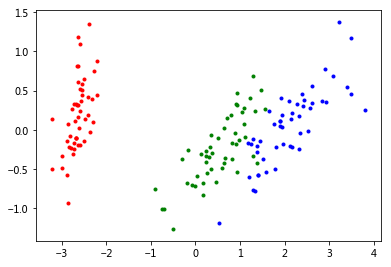

In [332]:
% matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets  as ds
import sklearn.decomposition  as de

# 加载数据集
data, target = ds.load_iris(return_X_y=True)

# 构建PCA对象
pca = de.PCA(n_components=2)   #, svd_solver='arpack',copy=True)
# 训练数据
pca.fit(data)    # 返回pca本身

# 对数据降维
# data_de = pca.transform(data)
# data_de = pca.fit_transform(data)
data_de

# 数据可视化
fig = plt.figure('PCA降维', figsize=(6, 4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(data_de[0:50, 0], data_de[0:50:, 1], s=9, c='r')
ax.scatter(data_de[50:100, 0], data_de[50:100:, 1], s=9, c='g')
ax.scatter(data_de[100:150, 0], data_de[100:150:, 1], s=9, c='b')

plt.show()


In [338]:
print(pca.get_precision())
print('-------')
print(pca.get_covariance())
print('-------')
print(pca.singular_values_)
print('-------')
print(pca.explained_variance_)
print('-------')
print(pca.explained_variance_ratio_)
print('-------')
print(pca.noise_variance_)

# 均值处理
print(np.mean(data_de))

[[10.38525514 -6.82204502 -4.20572606 -1.7510368 ]
 [-6.82204502 11.21577598  3.34261     1.41240052]
 [-4.20572606  3.34261     4.90734692 -6.14476038]
 [-1.7510368   1.41240052 -6.14476038 16.99268128]]
-------
[[ 0.67919741 -0.03258618  1.27066452  0.5321852 ]
 [-0.03258618  0.18113034 -0.31863564 -0.13363564]
 [ 1.27066452 -0.31863564  3.11934547  1.28541527]
 [ 0.5321852  -0.13363564  1.28541527  0.58961806]]
-------
[25.08986398  6.00785254]
-------
[4.22484077 0.24224357]
-------
[0.92461621 0.05301557]
-------
0.05110346761007829
1.5395092608135505e-16


- 降维后的数据再用于其他机器学习算法，可以提高计算速度，降低计算成本。

# PCA算法模型


## 数据与符号表示

- 假设数据样本为$(m, n)$，特征维数是$n$，样本总数是$m$



$
X
=
\begin{bmatrix}
{x_{11}}&{x_{12}}&{\cdots}&{x_{1n}}\\
{x_{21}}&{x_{22}}&{\cdots}&{x_{2n}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{x_{m1}}&{x_{m2}}&{\cdots}&{x_{mn}}\\
\end{bmatrix}
= 
\begin{bmatrix}
{X_{1}}\\
{X_{2}}\\
{\vdots}\\
{X_{m}}\\
\end{bmatrix}
$  


- 其中
    - $X$表示所有样本形成的矩阵。
    - $X_i$标识一个具有$n$维特征的样本。
    - 整个数据集样本个数是$m$个。
    - $x_{ij}$表示第$i$个样本的第$j$个特征。

- 如果使用特征来表示

$
X
=
\begin{bmatrix}
{x_{11}}&{x_{12}}&{\cdots}&{x_{1n}}\\
{x_{21}}&{x_{22}}&{\cdots}&{x_{2n}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{x_{m1}}&{x_{m2}}&{\cdots}&{x_{mn}}\\
\end{bmatrix}
= 
\begin{bmatrix}
{Y_{1}}&{Y_{2}}&{\vdots}&{Y_{n}}
\end{bmatrix}
$  


- 其中
    - $X$表示所有样本形成的矩阵。
    - $Y_i$标识一个具有$m$样本的特征变量。
    - 整个数据集样本特征维数是$n$个。

## 数据样本例子

- 鸢尾花数据集

In [224]:
import sklearn.datasets  as ds

# 加载数据集
data, target = ds.load_iris(return_X_y=True)

In [225]:
data.shape    # 150就是样本个数，4就是特征维数，每一行表示一个样本，每列表示一个特征

(150, 4)

## 协方差矩阵模型

### 协方差模型公式

- 假设$Y_i, Y_j$是表示两个样本总数为$m$的特征（再数学上称呼为特征变量）。

$
cov(Y_i, Y_j)
=
\dfrac
{\sum \limits _{k=1} ^{m} (Y_{ik} - \bar{Y_i})(Y_{jk} - \bar{Y_j}) }
{m-1}
$


- 如果使用向量或者矩阵表示，则是下面公式

$
cov(Y_i, Y_j)= \dfrac{(Y_i-\bar{Y_i})(Y_j - \bar{Y_j})^T}{m-1}
$



### 协方差实现

In [226]:
import sklearn.datasets  as ds
import numpy as np

# 加载数据集
data, target = ds.load_iris(return_X_y=True)

# 取前面两个特征做例子
Y_0 = data[:,0]
Y_1 = data[:,1]
Y_0,Y_1

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
      

In [227]:
# 计算平均值
Y_0_mean = np.mean(Y_0)   # 按照行计算均值（就是样本均值）
Y_1_mean = np.mean(Y_1) 
Y_0_mean,Y_1_mean

(5.843333333333334, 3.0540000000000003)

In [319]:
# 中心化(中心化以后的样本均值为0：因为误差，实际计算中是接近0)
Y_0 = Y_0 - Y_0_mean     
Y_1 = Y_1 - Y_1_mean
Y_0.shape, Y_1.shape

((150,), (150,))

In [229]:
# 计算协方差
cv = np.dot(Y_0, Y_1)/(len(Y_0)-1)
cv

-0.03926845637583892

In [230]:
# numpy的计算结果
# 注意下面计算的结果是协方差矩阵，观察上面计算的值与下面计算的对应的值
np.cov(data[:,0:2].T),    np.cov(Y_0),      np.cov(Y_1),

(array([[ 0.68569351, -0.03926846],
        [-0.03926846,  0.18800403]]), array(0.68569351), array(0.18800403))

### 协方差矩阵模型

- 根据上面的计算细节，可以把协方差矩阵的计算公式表示如下。

#### 对特征中心化

- **注意：** 
    - 不是对样本去中心化,而是特征，这里鸢尾花4个特征，每个特征150个数据样本。

- $\bar{Y}$ 表示对某个特征的所有样本求均值，去中心化公式：
    - $Y_c = Y - \bar{Y}$
    - 其中$Y_c$表示去中心化后的特征变量

In [282]:
import sklearn.datasets  as ds
import numpy as np

# 加载数据集
data, target = ds.load_iris(return_X_y=True)
data = np.mat(data)    # 使用矩阵类型，可以保持形状

In [283]:
data_mean = np.mean(data, axis=0)
data_mean    # 这个维数应该是样本个数(150, 1)

matrix([[5.84333333, 3.054     , 3.75866667, 1.19866667]])

In [284]:
# 去中心化
Y = data - data_mean
data[0], data_mean, data[0] - data_mean, Y[0]   # 验证上面的计算结果


(matrix([[5.1, 3.5, 1.4, 0.2]]),
 matrix([[5.84333333, 3.054     , 3.75866667, 1.19866667]]),
 matrix([[-0.74333333,  0.446     , -2.35866667, -0.99866667]]),
 matrix([[-0.74333333,  0.446     , -2.35866667, -0.99866667]]))

#### 计算协方差矩阵

- 协方差矩阵公式
    - $\dfrac{Y_c Y_c^T}{m-1}$
    - 其中$m$表示的是样本个数。（不是特征维数）
    

In [285]:
Y_cov = np.matmul(Y.T,Y)/ (Y.shape[0]-1)
Y_cov

matrix([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
        [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
        [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
        [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

- 这是PCA算出来的协方差（降维为2的计算结果）
```python
[[ 0.67919741 -0.03258618  1.27066452  0.5321852 ]
 [-0.03258618  0.18113034 -0.31863564 -0.13363564]
 [ 1.27066452 -0.31863564  3.11934547  1.28541527]
 [ 0.5321852  -0.13363564  1.28541527  0.58961806]]
```

- 这是PCA算出来的协方差（降维为2的计算结果）

```python
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
```

In [286]:
# 使用numpy计算的协方差矩阵验证
np.cov(Y.T)    # 与上面比对，验证计算的正确性

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [287]:
Y_cov[3,0],Y_cov[0,3]   # 这是一个对称矩阵

(0.5169038031319912, 0.5169038031319912)

## 特征向量模型

- 特征向量与特征值，通过矩阵的奇异值分解得到。

### 特征方程的定义

- 特征方程值得是对一个矩阵$M$，如果存在一个标量$\lambda$与列向量$u$，满足如下等式：
    - $Mu=\lambda u$
    
    - 称$\lambda$ 为矩阵$M$的特征值，$u$为矩阵$M$的特征向量
    
    
- 求解特征值与特征向量的方法就是奇异值分解算法。
    - 其中$\lambda$与列向量$u$不是唯一的。所有的特征值与特征向量可以表达成如下公式。    

$
M [u_1, u_2, \dots, u_n ] 
=
[u_1, u_2, \dots, u_n ] 
\begin{bmatrix}
{\lambda_1}&{0}&{\cdots}&{0}\\
{0}&{\lambda_2}&{\cdots}&{0}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{0}&{0}&{\cdots}&{\lambda_n}\\
\end{bmatrix}
$

- 如果全部使用矩阵表达，则可以表达如下：
    - $MU=U\Sigma$



- 如果对于**方阵** ，推导一下可以得到：
    - $M = U \Sigma U^{-1}$

- SVD自己实现比较痛苦，对这种完全已经理解，并信任的实现，可以调用第三方实现，这里调用numpy的函数实现。

```python
    numpy.linalg.svd(
        a,     # 被求解的矩阵（方阵）
        full_matrices=True,    # 影响输出的特征向量的维度，采用默认值即可
        compute_uv=True)     # 计算特征向量
```

- 返回左特征向量矩阵 ， 特征值矩阵，右特征向量（在方阵情况下，就是左特征向量矩阵的逆） 

In [288]:
import numpy.linalg  as la
u,s,v = la.svd(Y_cov)

In [289]:
u.shape

(4, 4)

In [290]:
v.shape

(4, 4)

In [291]:
s.shape

(4,)

In [292]:
s    # 这里的特征值与PCA计算出来的有差异

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [293]:
# 使用PCA降维为2的协方差的结果
import numpy as  np
import numpy.linalg  as la
M = np.mat(
    [[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
    [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
    [ 1.27066452, -0.31863564,  3.11934547,  1.28541527], 
    [ 0.5321852,  -0.13363564,  1.28541527,  0.58961806]]
)
la.svd(M)

(matrix([[-0.36158968, -0.65653989,  0.50672256, -0.42595836],
         [ 0.08226889, -0.72971236, -0.51869935,  0.43783865],
         [-0.85657211,  0.17576741, -0.47327155, -0.10678992],
         [-0.35884393,  0.07470646,  0.50019723,  0.78450794]]),
 array([4.22484077, 0.24224357, 0.05110347, 0.05110347]),
 matrix([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
         [-0.65653989, -0.72971236,  0.17576741,  0.07470646],
         [ 0.50672256, -0.51869935, -0.47327155,  0.50019723],
         [-0.42595836,  0.43783865, -0.10678992,  0.78450794]]))

In [321]:
# 使用scipy的奇异值分解
import scipy.linalg as sla
import numpy.linalg  as la
M = np.mat(
    [[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
    [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
    [ 1.27066452, -0.31863564,  3.11934547,  1.28541527], 
    [ 0.5321852,  -0.13363564,  1.28541527,  0.58961806]]
)
sla.svd(M)


(array([[-0.36158968, -0.65653989,  0.50672256, -0.42595836],
        [ 0.08226889, -0.72971236, -0.51869935,  0.43783865],
        [-0.85657211,  0.17576741, -0.47327155, -0.10678992],
        [-0.35884393,  0.07470646,  0.50019723,  0.78450794]]),
 array([4.22484077, 0.24224357, 0.05110347, 0.05110347]),
 array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
        [-0.65653989, -0.72971236,  0.17576741,  0.07470646],
        [ 0.50672256, -0.51869935, -0.47327155,  0.50019723],
        [-0.42595836,  0.43783865, -0.10678992,  0.78450794]]))

## 降维模型

- 选择对应最大特征值的两个特征向量

```python
[-0.36158968, -0.65653989,  0.50672256, -0.42595836],
[ 0.08226889, -0.72971236, -0.51869935,  0.43783865],
```

In [294]:
# 选择的特征
e = v[:, 0:2]   # 在V中取两列，或者u中取两行。
e

matrix([[-0.36158968,  0.08226889],
        [-0.65653988, -0.72971237],
        [ 0.58099728, -0.59641809],
        [ 0.31725455, -0.32409435]])

In [297]:
# 计算降维后的数据样本

de_data = np.matmul(data, e)
de_data.shape

(150, 2)

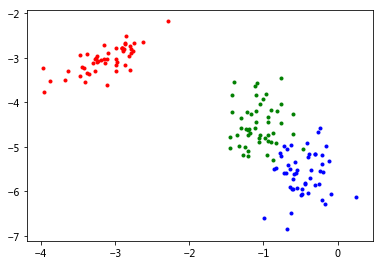

In [300]:
% matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets  as ds
import sklearn.decomposition  as de

# 数据可视化
fig = plt.figure('PCA降维', figsize=(6, 4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(list(de_data[0:50, 0]), list(de_data[0:50:, 1]), s=9, c='r')
ax.scatter(list(de_data[50:100, 0]), list(de_data[50:100:, 1]), s=9, c='g')
ax.scatter(list(de_data[100:150, 0]), list(de_data[100:150:, 1]), s=9, c='b')

plt.show()

# PCA算法数学基础

## 数据集准备

In [303]:
import sklearn.datasets  as ds
import numpy as np

# 加载数据集
data, target = ds.load_iris(return_X_y=True)

## 均值的概念

1. 样本总体的均值

In [304]:
np.mean(data,axis=0)

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

2. 一个样本的均值

In [305]:
np.mean(data[0])

2.55

## 方差的概念

In [306]:
# numpy的计算
np.var(data,axis=0)

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

In [307]:
# 手工计算
m = np.mean(data,axis=0)
s = np.zeros(shape=4)
for d in data:
    c = (d - m) * (d-m)
    s += c

r = s /len(data)
r

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

## 协方差的概念

1. 相同向量的协方差

In [308]:
# numpy的实现
np.cov(data[:,0])

array(0.68569351)

In [309]:
# 手工计算的结果

# 使用向量的每个特征 - 向量特征均值
a1 = data[:,0]-np.mean(data[:,0])    

#  计算每个特征的平方
a2 = a1 * a1

# 计算平方和
a3 = a2.sum()

#  求均值（无偏：除以n-1）
a4 = a3 / (len(data[:,0]) - 1)
a4

0.6856935123042507

2. 不同向量的协方差



- numpy中自动形成对称的矩阵（就是协方差矩阵）

In [310]:
# numpy的实现(使用两个参数)
np.cov(data[:,0],data[:,1])

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [313]:
# numpy的实现（使用一个参数：等同于上面参数的合并）
np.cov(data[:,0:2].T)

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [315]:
# 手工计算的结果

# 使用向量的每个特征 - 向量特征均值
x1 = data[:,0]-np.mean(data[:,0])    
y1 = data[:,1]-np.mean(data[:,1])    
#  计算每个特征的平方
a2 = x1 * y1

# 计算平方和
a3 = a2.sum()

#  求均值（无偏：除以n-1）
a4 = a3 / (len(data[:,0]) - 1)
a4


-0.03926845637583893

## 协方差矩阵的概念

- numpy的cov函数返回的协方差矩阵，协方差矩阵是向量与向量的转置，对应求方差得到的矩阵，现在说明如下（使用上面的符号）：

$
X
=
\begin{bmatrix}
{x_{11}}&{x_{12}}&{\cdots}&{x_{1n}}\\
{x_{21}}&{x_{22}}&{\cdots}&{x_{2n}}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{x_{m1}}&{x_{m2}}&{\cdots}&{x_{mn}}\\
\end{bmatrix}
= 
\begin{bmatrix}
{Y_{1}}&{Y_{2}}&{\vdots}&{Y_{n}}
\end{bmatrix}
$  


- 其中
    - $X$表示所有样本形成的矩阵。
    - $Y_i$标识一个具有$m$样本的特征变量。
    - 整个数据集样本特征维数是$n$个。

- X的协方差矩阵$cov(X)$就是：      


$
X
= 
\begin{bmatrix}
{Y_{1}} & {Y_{2}} & {\dots} & {Y_{n}}\\
\end{bmatrix}
$  


$
cov(X)=
\begin{bmatrix}
{cov(Y_1,Y_1)}&{cov(Y1,Y2)}&{\cdots}&{cov(Y_1,Y_n)}\\
{cov(Y_2,Y_1)}&{cov(Y_2,Y_1)}&{\cdots}&{cov(Y_2,Y_n)}\\
{\vdots}&{\vdots}&{\ddots}&{\vdots}\\
{cov(Y_n,Y_1)}&{cov(Y_n,Y_1)}&{\cdots}&{cov(Y_n,Y_n)}\\
\end{bmatrix}
$

- 协方差矩阵的维数为
    - $(n, n)$,其中n为特征维数)
    
    - 对鸢尾花数据而言就是（4，4）

In [317]:
# numpy的实现
np.cov(data.T).shape
np.cov(data.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

# PCA算法完整实现(numpy实现)

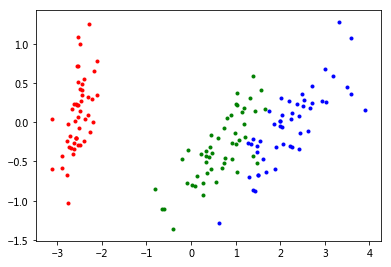

In [349]:
% matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets  as ds
import numpy as np
import numpy.linalg  as la

# 加载数据集
data, target = ds.load_iris(return_X_y=True)
data = np.mat(data)    # 使用矩阵类型，可以保持形状
# 计算均值
data_mean = np.mean(data, axis=0)  # 按照特征，返回（1，4）向量
# 使用均值中心化
Y = data - data_mean
# 计算Y的协方差
Y_cov = np.matmul(Y.T,Y)/ (Y.shape[0]-1)

# 求奇异值分解
u,s,v = la.svd(Y_cov)

# 选择特征向量
e = u[:, 0:2]   # 在V中取两列，或者u中取两行。

# 计算降维后的数据样本
de_data = np.matmul(data, e)
de_data = np.mean(de_data)-de_data   #中心化处理的算法中做了一个简单的中心化处理
# 可视化降维以后的数据
fig = plt.figure('PCA降维', figsize=(6, 4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.scatter(list(de_data[0:50, 0]), list(de_data[0:50:, 1]), s=9, c='r')
ax.scatter(list(de_data[50:100, 0]), list(de_data[50:100:, 1]), s=9, c='g')
ax.scatter(list(de_data[100:150, 0]), list(de_data[100:150:, 1]), s=9, c='b')

plt.show()

- 对比下PCA可视化降维的效果
